       socialNbFollowers  socialNbFollows  socialProductsLiked  \
count        1207.000000      1207.000000          1207.000000   
mean            6.840099         8.777133            24.181442   
std             3.160985         2.677690            63.134772   
min             3.000000         0.000000             0.000000   
25%             4.000000         8.000000             0.000000   
50%             6.000000         8.000000             2.000000   
75%             9.000000         8.000000            15.000000   
max            15.000000        30.000000           480.000000   

       productsListed  hasProfilePicture  daysSinceLastLogin    seniority  \
count     1207.000000        1207.000000         1207.000000  1207.000000   
mean         2.349627           0.717481          103.879867  3051.381939   
std          1.513471           0.450411          158.834127   170.550593   
min          1.000000           0.000000           11.000000  2852.000000   
25%          1.00000

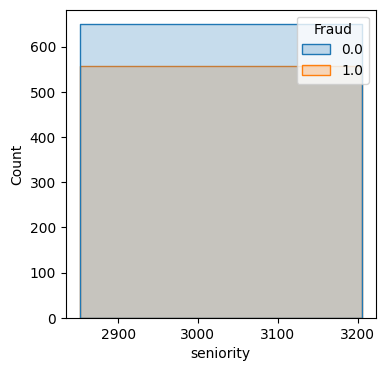

In [7]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("raw_data.csv")
data.drop(['identifierHash','type','country','language','hasAnyApp','civilityTitle','civilityGenderId','seniorityAsMonths','seniorityAsYears','countryCode','productsWished','productsBought','hasAndroidApp','hasIosApp'],axis=1,inplace=True)

#print(data['gender'].unique())
converted = pd.get_dummies(data['gender'], drop_first=1)
data = pd.concat([data, converted], axis = 1)
data.drop('gender',axis = 1, inplace=True)
data.rename(columns={'M': 'Male'}, inplace=True)
#print(data['Male'].unique())
data = data.fillna(0)
data = data.astype(int)


def zscore(array):
    thr = 3
    mean = np.mean(array)
    std = np.std(array)
    z_scores = (array - mean) / std
    return np.abs(z_scores) > thr


combined_condition = ~(zscore(data['socialNbFollows']) | zscore(data['socialNbFollowers']) | zscore(data['productsListed']) | zscore(data['productsSold']) | zscore(data['socialProductsLiked']))
data = data[combined_condition]
data.reset_index(drop=True, inplace=True)
#print(data.head())
#print(data.describe())


def pure_round(num):
    integer = int(num)
    fraction = num - float(integer)
    if fraction >= 0.5:
        integer += 1
    return integer

data = data[data['productsListed'] != 0]
for i in data.index:
    case_no = data.loc[i,'productsSold']
    pass_no = pure_round((case_no * data.loc[i,'productsPassRate']) / 100)
    fail_no = case_no - pass_no
    data.loc[i,'productsPassed'] = pass_no
    data.loc[i,'productsFailed'] = fail_no
    if case_no == 0:
        data.drop(i, axis=0, inplace=True)
 
data.drop(['productsPassRate','productsSold'], axis=1, inplace=True)

# Encodedict = {}
# for i in ['Male','hasProfilePicture']:
#     key = '_{}'.format(i)
#     le = LabelEncoder()
#     data[key] = le.fit_transform(list(data[i]))
#     Encodedict[key] = le.classes_

# data.drop(['Male','hasProfilePicture'], axis=1, inplace=True)

dfdict = {}
for j in data.index:
    x = data.loc[j,'productsPassed']
    y = data.loc[j,'productsFailed']
    if x != 0:
        data.loc[j,'Fraud'] = 0
        df = pd.DataFrame(data.loc[j,:]).transpose()
        ldf = pd.concat([df]*int(x), ignore_index=True)
    
    if y != 0:
        data.loc[j,'Fraud'] = 1
        df2 = pd.DataFrame(data.loc[j,:]).transpose()
        ldf2 = pd.concat([df2]*int(y), ignore_index=True)
    
    if x != 0 and y != 0:
        dfdict[j] = pd.concat([ldf, ldf2], ignore_index=True)
    elif x != 0:
        dfdict[j] = ldf
    else:
        dfdict[j] = ldf2

data_new = pd.concat(dfdict.values(), ignore_index=True)
data_new.drop(['productsPassed','productsFailed'], axis=1, inplace=True)
print(data_new.describe())


from sklearn.model_selection import train_test_split

# Assuming 'Fraud' is your target variable
X = data_new.drop('Fraud', axis=1)  # Features
y = data_new['Fraud']  # Target variable

plt.figure(figsize=(4, 4))
#sns.countplot(x='productsListed', hue='Fraud', data=data_new, palette = 'inferno')
#sns.boxplot(x='productsListed', y='socialNbFollowers', hue='Fraud', data=data, palette = 'inferno')
sns.histplot(x = 'seniority', data = data_new, binwidth = 350, hue = 'Fraud', element = 'step')
# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can reset index for train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)




       socialNbFollowers  socialNbFollows  socialProductsLiked  \
count        1207.000000      1207.000000          1207.000000   
mean            6.840099         8.777133            24.181442   
std             3.160985         2.677690            63.134772   
min             3.000000         0.000000             0.000000   
25%             4.000000         8.000000             0.000000   
50%             6.000000         8.000000             2.000000   
75%             9.000000         8.000000            15.000000   
max            15.000000        30.000000           480.000000   

       productsListed  hasProfilePicture  daysSinceLastLogin    seniority  \
count     1207.000000        1207.000000         1207.000000  1207.000000   
mean         2.349627           0.717481          103.879867  3051.381939   
std          1.513471           0.450411          158.834127   170.550593   
min          1.000000           0.000000           11.000000  2852.000000   
25%          1.00000

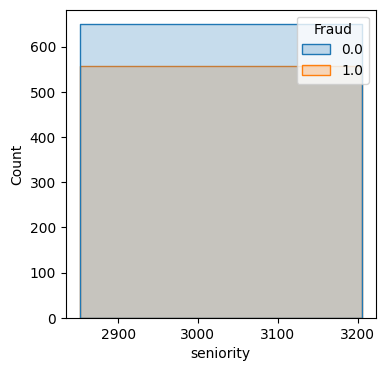

In [40]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("raw_data.csv")
data.drop(['identifierHash','type','country','language','hasAnyApp','civilityTitle','civilityGenderId','seniorityAsMonths','seniorityAsYears','countryCode','productsWished','productsBought','hasAndroidApp','hasIosApp'],axis=1,inplace=True)

#print(data['gender'].unique())
converted = pd.get_dummies(data['gender'], drop_first=1)
data = pd.concat([data, converted], axis = 1)
data.drop('gender',axis = 1, inplace=True)
data.rename(columns={'M': 'Male'}, inplace=True)
#print(data['Male'].unique())
data = data.fillna(0)
data = data.astype(int)


def zscore(array):
    thr = 3
    mean = np.mean(array)
    std = np.std(array)
    z_scores = (array - mean) / std
    return np.abs(z_scores) > thr


combined_condition = ~(zscore(data['socialNbFollows']) | zscore(data['socialNbFollowers']) | zscore(data['productsListed']) | zscore(data['productsSold']) | zscore(data['socialProductsLiked']))
data = data[combined_condition]
data.reset_index(drop=True, inplace=True)
#print(new_data.head())
#print(data.describe())


def pure_round(num):
    integer = int(num)
    fraction = num - float(integer)
    if fraction >= 0.5:
        integer += 1
    return integer

data = data[data['productsListed'] != 0]
for i in data.index:
    case_no = data.loc[i,'productsSold']
    pass_no = pure_round((case_no * data.loc[i,'productsPassRate']) / 100)
    fail_no = case_no - pass_no
    data.loc[i,'productsPassed'] = pass_no
    data.loc[i,'productsFailed'] = fail_no
    if case_no == 0:
        data.drop(i, axis=0, inplace=True)
 
data.drop(['productsPassRate','productsSold'], axis=1, inplace=True)

# Encodedict = {}
# for i in ['Male','hasProfilePicture']:
#     key = '_{}'.format(i)
#     le = LabelEncoder()
#     data[key] = le.fit_transform(list(data[i]))
#     Encodedict[key] = le.classes_

# data.drop(['Male','hasProfilePicture'], axis=1, inplace=True)

dfdict = {}
for j in data.index:
    x = data.loc[j,'productsPassed']
    y = data.loc[j,'productsFailed']
    if x != 0:
        data.loc[j,'Fraud'] = 0
        df = pd.DataFrame(data.loc[j,:]).transpose()
        ldf = pd.concat([df]*int(x), ignore_index=True)
    
    if y != 0:
        data.loc[j,'Fraud'] = 1
        df2 = pd.DataFrame(data.loc[j,:]).transpose()
        ldf2 = pd.concat([df2]*int(y), ignore_index=True)
    
    if x != 0 and y != 0:
        dfdict[j] = pd.concat([ldf, ldf2], ignore_index=True)
    elif x != 0:
        dfdict[j] = ldf
    else:
        dfdict[j] = ldf2

data_new = pd.concat(dfdict.values(), ignore_index=True)
data_new.drop(['productsPassed','productsFailed'], axis=1, inplace=True)
print(data_new.describe())


from sklearn.model_selection import train_test_split

# Assuming 'Fraud' is your target variable
X = data_new.drop('Fraud', axis=1)  # Features
y = data_new['Fraud']  # Target variable

plt.figure(figsize=(4, 4))
#sns.countplot(x='productsListed', hue='Fraud', data=data_new, palette = 'inferno')
#sns.boxplot(x='productsListed', y='socialNbFollowers', hue='Fraud', data=data, palette = 'inferno')
sns.histplot(x = 'seniority', data = data_new, binwidth = 350, hue = 'Fraud', element = 'step')
# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can reset index for train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
# pd.plotting.scatter_matrix (data, figsize = [30,30])
# plt.show()
# data.hist(bins=50, figsize=(20,15))
# plt.show()


In [29]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X_train, y_train):
        # Convert to NumPy arrays if necessary
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.to_numpy()
        if isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

        # Calculate class probabilities
        unique_classes = np.unique(y_train)
        self.class_probabilities = {cls: np.mean(y_train == cls) for cls in unique_classes}

        # Calculate feature probabilities for each class
        self.feature_probabilities = {cls: {} for cls in unique_classes}
        for cls in unique_classes:
            X_cls = X_train[y_train == cls]
            # Iterate through each feature (column)
            for feature_index in range(X_train.shape[1]):
                # Calculate mean and standard deviation for each feature
                mean = np.mean(X_cls[:, feature_index])
                std = np.std(X_cls[:, feature_index])
                # Store mean and std for this feature
                self.feature_probabilities[cls][feature_index] = (mean, std)

    def predict(self, X_test):
        # Convert to NumPy array if necessary
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.to_numpy()

        predictions = []
        for row in X_test:
            max_prob = float('-inf')
            predicted_class = None
            # Iterate through each class
            for cls in self.class_probabilities:
                # Calculate the log prior probability for the class
                class_prob = np.log(self.class_probabilities[cls])
                # Calculate the likelihood for each feature
                for feature_index in range(X_test.shape[1]):
                    mean, std = self.feature_probabilities[cls][feature_index]
                    # Calculate Gaussian probability for each feature
                    likelihood = self.gaussian_probability(row[feature_index], mean, std)
                    # Add log-likelihood (to prevent underflow)
                    class_prob += np.log(likelihood)
                # Update max_prob and predicted_class if necessary
                if class_prob > max_prob:
                    max_prob = class_prob
                    predicted_class = cls
            predictions.append(predicted_class)
        return np.array(predictions)

    def gaussian_probability(self, x, mean, std):
        if std == 0:
            # Handle case where std is zero
            return 1.0 if x == mean else 0.0
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent


In [30]:
# nb = NaiveBayes()
# nb.fit(X_train, y_train)nb_classifier = NaiveBayesClassifier()
# from sklearn.model_selection import train_test_split
# import numpy as np
nb_classifier = NaiveBayesClassifier()
# Train the classifier
nb_classifier.fit(X_train, y_train)

In [31]:

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6115702479338843


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the classification report
print("Naive Bayes:\n", report)

Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.62      0.81      0.70       136
         1.0       0.59      0.36      0.45       106

    accuracy                           0.61       242
   macro avg       0.61      0.58      0.57       242
weighted avg       0.61      0.61      0.59       242



In [34]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the number of principal components you want to retain
n_components = 6  # You can adjust this value

# Apply PCA to the feature data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
print('in-built function: ')
# Train the classifier on the PCA-transformed data
gnb.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_pca = gnb.predict(X_test_pca)

# Calculate the accuracy of the PCA-transformed model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

# Train a Naive Bayes classifier without PCA for comparison
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without PCA:", accuracy)

# Compare the accuracy with and without PCA
if accuracy_pca > accuracy:
    print("PCA improved accuracy.")
else:
    print("PCA did not improve accuracy.")


in-built function: 
Accuracy with PCA: 0.6157024793388429
Accuracy without PCA: 0.6115702479338843
PCA improved accuracy.


In [35]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = {}

    def fit(self, X_train, y_train):
        # Convert to NumPy arrays if necessary
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.to_numpy()
        if isinstance(y_train, pd.Series):
            y_train = y_train.to_numpy()

        # Calculate class probabilities
        unique_classes = np.unique(y_train)
        self.class_probabilities = {cls: np.mean(y_train == cls) for cls in unique_classes}

        # Calculate feature probabilities for each class
        self.feature_probabilities = {cls: {} for cls in unique_classes}
        for cls in unique_classes:
            X_cls = X_train[y_train == cls]
            # Iterate through each feature (column)
            for feature_index in range(X_train.shape[1]):
                # Calculate mean and standard deviation for each feature
                mean = np.mean(X_cls[:, feature_index])
                std = np.std(X_cls[:, feature_index])
                # Store mean and std for this feature
                self.feature_probabilities[cls][feature_index] = (mean, std)

    def predict(self, X_test):
        # Convert to NumPy array if necessary
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.to_numpy()

        predictions = []
        for row in X_test:
            max_prob = float('-inf')
            predicted_class = None
            # Iterate through each class
            for cls in self.class_probabilities:
                # Calculate the log prior probability for the class
                class_prob = np.log(self.class_probabilities[cls])
                # Calculate the likelihood for each feature
                for feature_index in range(X_test.shape[1]):
                    mean, std = self.feature_probabilities[cls][feature_index]
                    # Calculate Gaussian probability for each feature
                    likelihood = self.gaussian_probability(row[feature_index], mean, std)
                    # Add log-likelihood (to prevent underflow)
                    class_prob += np.log(likelihood)
                # Update max_prob and predicted_class if necessary
                if class_prob > max_prob:
                    max_prob = class_prob
                    predicted_class = cls
            predictions.append(predicted_class)
        return np.array(predictions)

    def gaussian_probability(self, x, mean, std):
        if std == 0:
            # Handle case where std is zero
            return 1.0 if x == mean else 0.0
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent


In [37]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define the number of principal components you want to retain
n_components = 6  # You can adjust this value

# Apply PCA to the feature data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a Gaussian Naive Bayes classifier
gnb = NaiveBayesClassifier()
print('from the scratch implementation:')
# Train the classifier on the PCA-transformed data
gnb.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred_pca = gnb.predict(X_test_pca)

# Calculate the accuracy of the PCA-transformed model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

# Train a Naive Bayes classifier without PCA for comparison
gnb = NaiveBayesClassifier()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without PCA:", accuracy)

# Compare the accuracy with and without PCA
if accuracy_pca > accuracy:
    print("PCA improved accuracy.")
else:
    print("PCA did not improve accuracy.")


from the scratch implementation:
Accuracy with PCA: 0.6157024793388429
Accuracy without PCA: 0.6115702479338843
PCA improved accuracy.
